# Visualizing Earnings Based On College Majors
We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

| Column | Description |
| ----------- | ----------- |
| Rank | Rank by median earnings (the dataset is ordered by this column). |
| Major_code | Major code |
|Major | Major description|
|Major_category | Category of major|
|Total |Total number of people with major|
|Sample_size| Sample size (unweighted) of full-time|
|Men|Male graduates|
|Women| Female graduates|
| ShareWomen| Women as share of total|
| Employed | Number employed|
|Median | Median salary of full-time, year-round workers|
|Low_wage_jobs | Number in low-wage service jobs|
|Full_time | Number employed 35 hours or more|
|Part_time | Number employed less than 35 hours|

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?

 Using scatter plots
- How many majors are predominantly male? Predominantly female?

 Using histograms
- Which category of majors have the most students?

 Using bar plots
 
 ## 1- Explore our dataset
 We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

recent_grads = pd.read_csv('recent-grads.csv')

print(recent_grads.iloc[0])#the first row formatted as a table
print('\n')
print(recent_grads.head()) #become familiar with how the data is structured
print('\n')
print(recent_grads.tail()) #become familiar with how the data is structured
print('\n')
print(recent_grads.describe()) #generate summary statistics for all of the numeric columns

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


   Rank  

Let's drop rows containing missing values because it'll cause matplotlib to throw errors.

In [2]:
row_data_count = recent_grads.shape[0] #the number of rows
recent_grads = recent_grads.dropna() #drop rows containing missing values
cleaned_data_count = recent_grads.shape[0]

print("Before number of rows {} and after number of rows {}".format(row_data_count,cleaned_data_count))

Before number of rows 173 and after number of rows 172


## 2- Using scatter plot

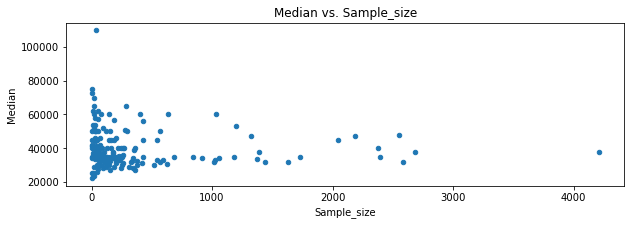

In [3]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size', figsize=(10,3))

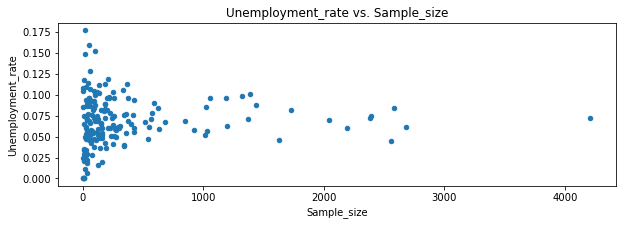

In [4]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter',title='Unemployment_rate vs. Sample_size', figsize=(10,3))

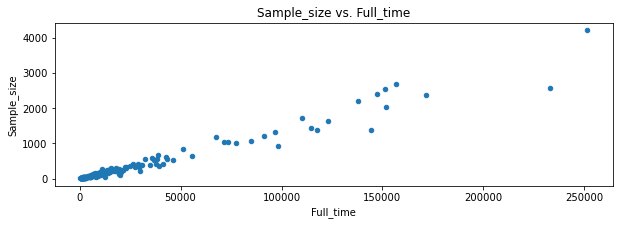

In [5]:
recent_grads.plot(x='Full_time', y='Sample_size', kind='scatter',title='Sample_size vs. Full_time', figsize=(10,3))

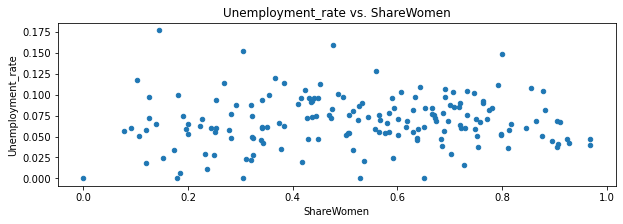

In [6]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter',title='Unemployment_rate vs. ShareWomen', figsize=(10,3))

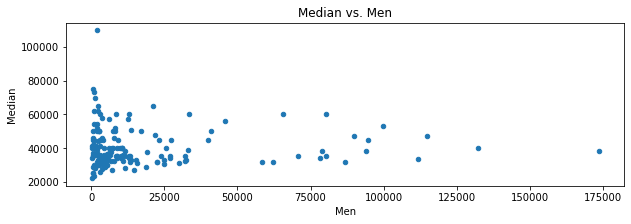

In [7]:
recent_grads.plot(x='Men', y='Median', kind='scatter',title='Median vs. Men', figsize=(10,3))

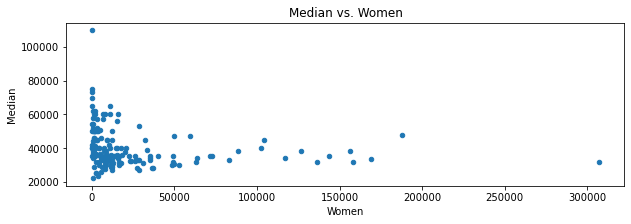

In [8]:
recent_grads.plot(x='Women', y='Median', kind='scatter',title='Median vs. Women', figsize=(10,3))

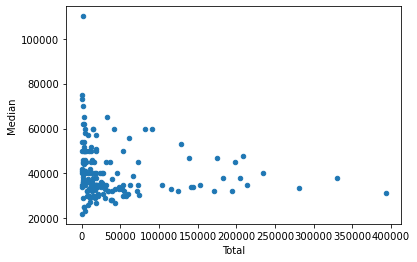

In [9]:
recent_grads.plot(x='Total', y='Median', kind='scatter')

This plot reply to this question : `Do students in more popular majors make more money?` . The plot show us the students in more popular major don't make more money cause there is no concentration of point on the top-right side of the plot.

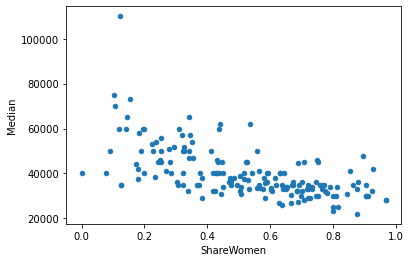

In [10]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

This plot is for : `Do students that majored in subjects that were majority female make more money?` .

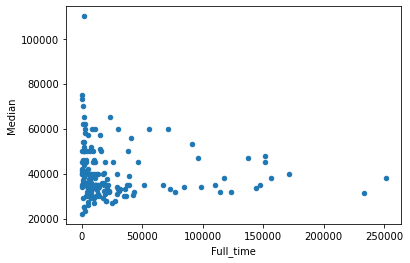

In [11]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

This plot is for : `Is there any link between the number of full-time employees and median salary?` .

## 2- Using histogram plots

Let's reply to these question : `How many majors are predominantly male? Predominantly female?`

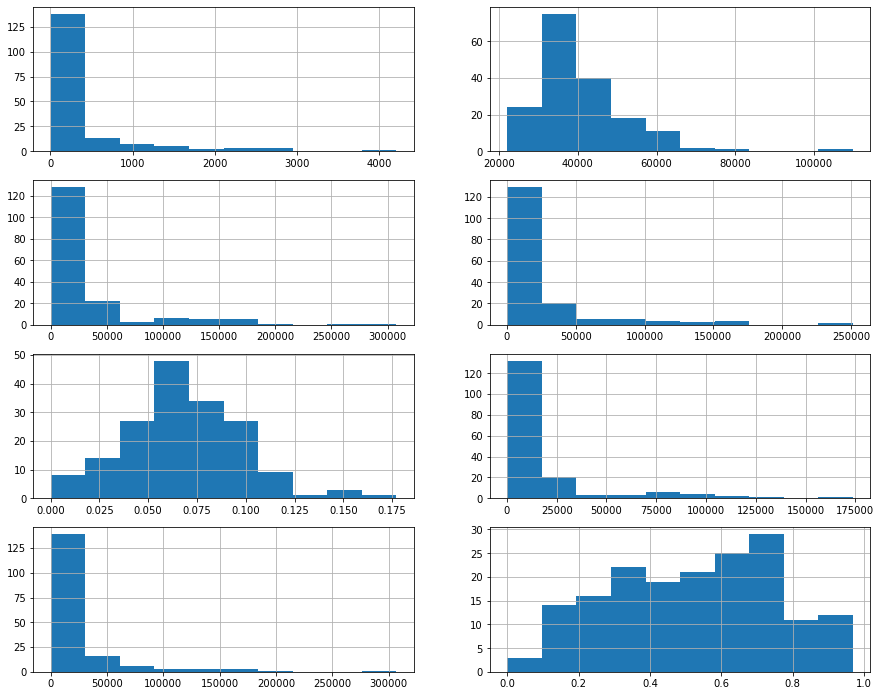

In [12]:
columns = ["Sample_size", "Median", "Employed", "Full_time", "Unemployment_rate","Men", "Women", "ShareWomen"]
fig = plt.figure(figsize=(15,25))
for i in range(0,8):
    ax = fig.add_subplot(8,2,i+1)
    ax = recent_grads[columns[i]].hist(bins=10)

To reply our question , we check the last plot (for ShareWomen). By that we have **25** Major that are predominantly women so for men is **147** *(172 - 25)*

## 3- Using scatter matrix plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bfa3f40>,
      dtype=object)

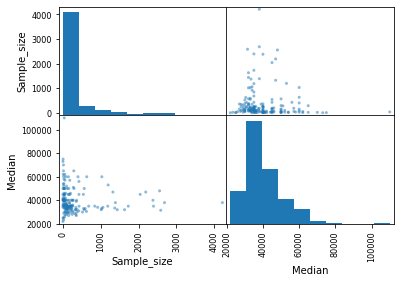

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c357400>,
      dtype=object)

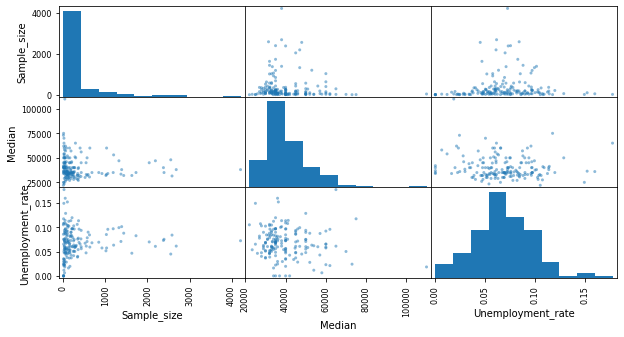

In [14]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize = (10,5))

## 4- Using bar plots

Question : `Which category of majors have the most students?`

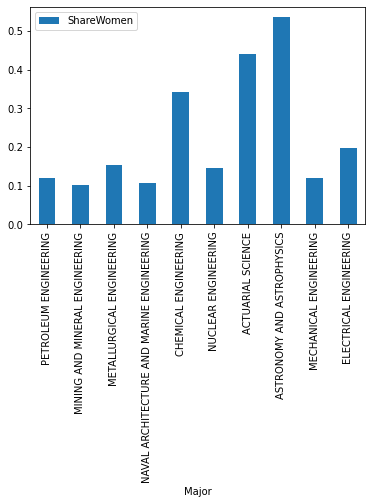

In [15]:
recent_grads[:10].plot.bar(x= 'Major' , y= 'ShareWomen')

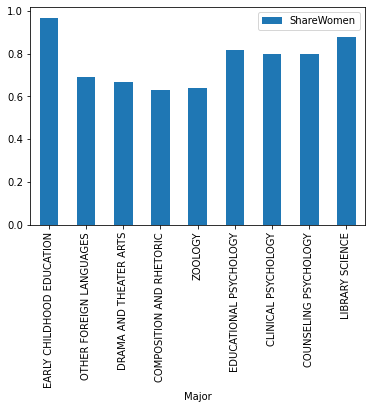

In [16]:
recent_grads[163:].plot.bar(x= 'Major' , y= 'ShareWomen')

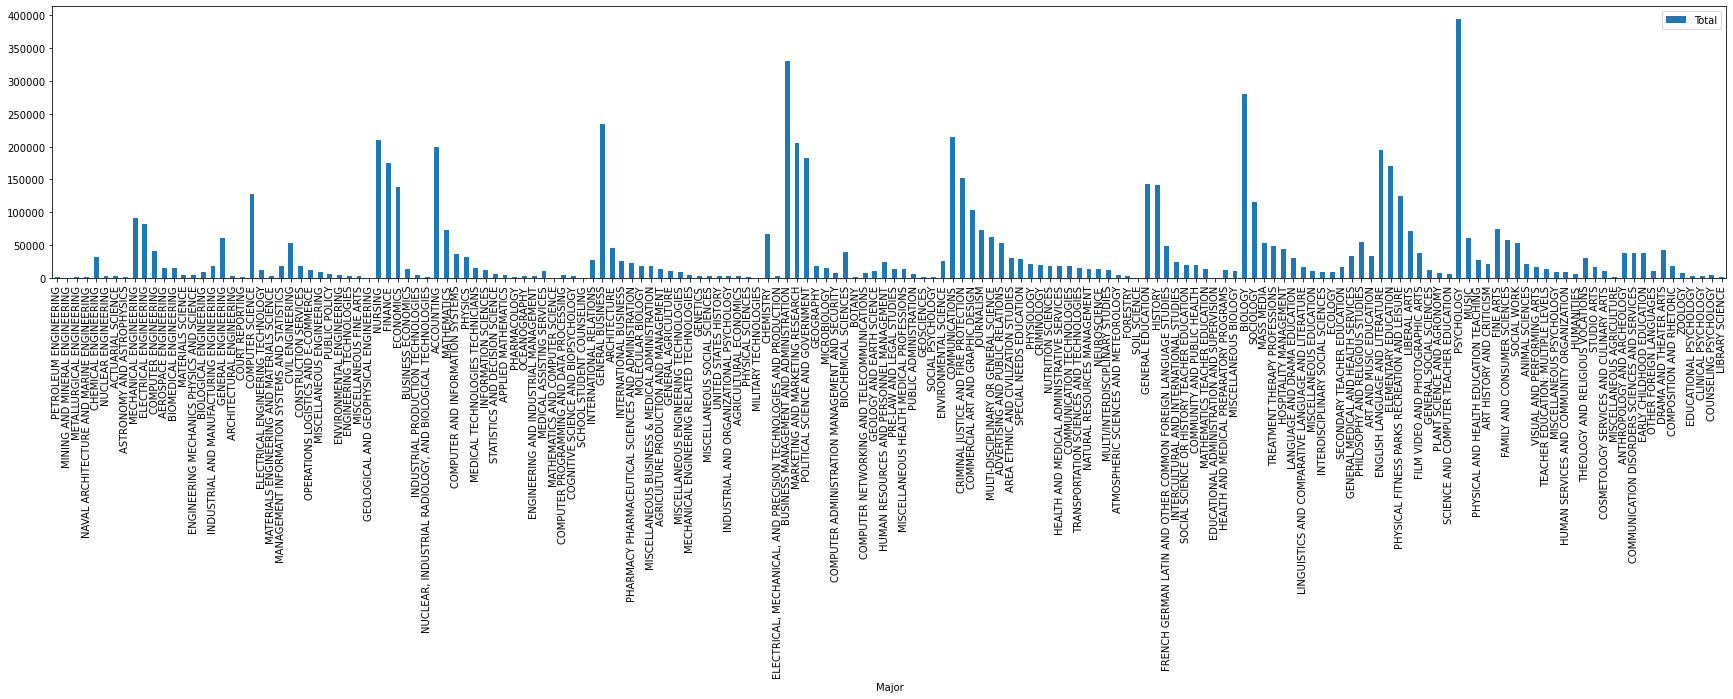

In [17]:
recent_grads.plot.bar(x= 'Major' , y= 'Total',figsize = (30,5))

The answer of the question is : *PSYCHOLOGY*

## 4- Others questions

- Using a grouped bar plot to compare the number of men with the number of women in each category of majors.

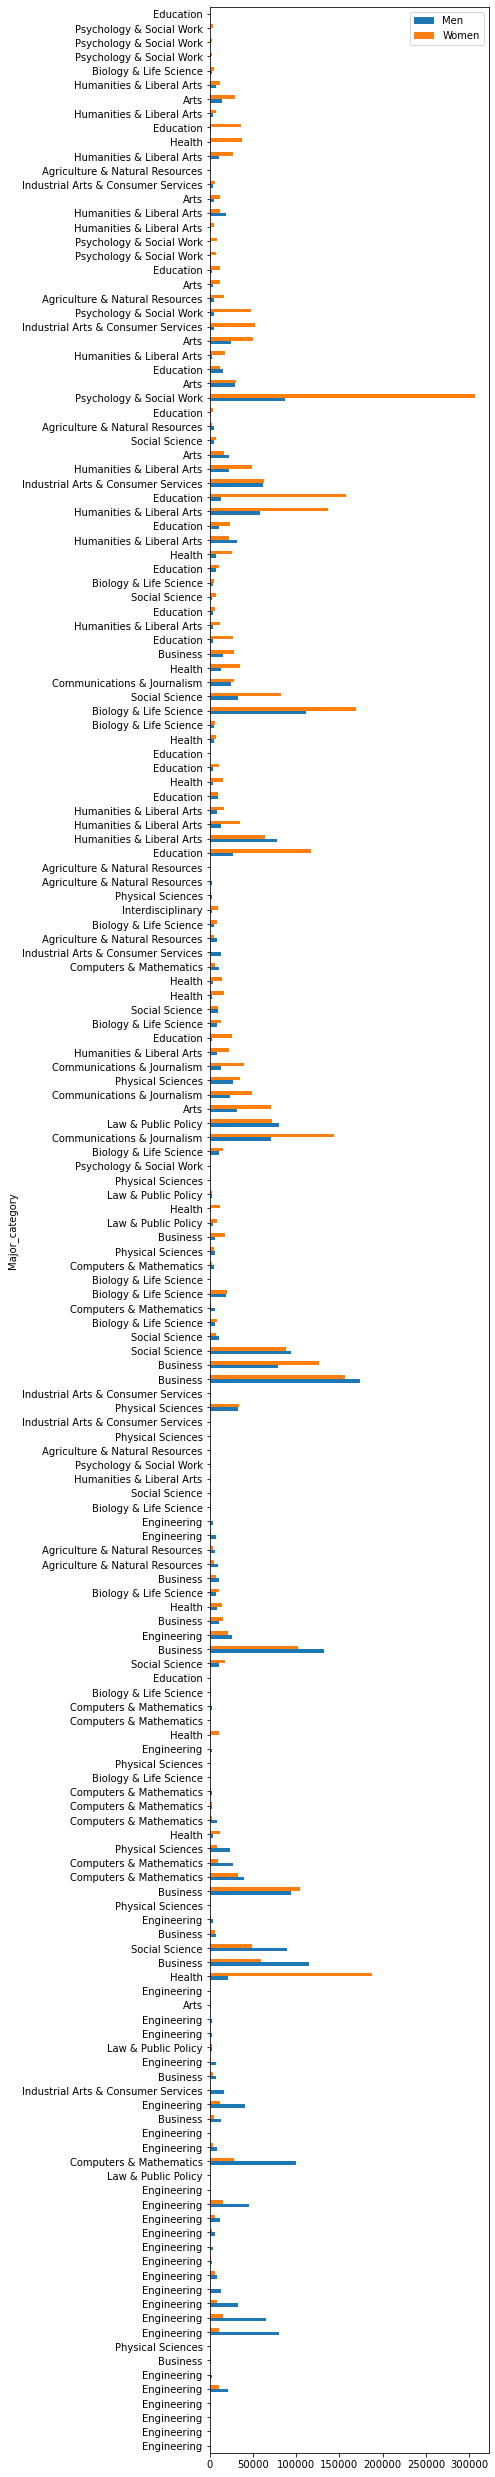

In [18]:
recent_grads.plot.barh(x= 'Major_category' , y= ['Men','Women'],figsize = (5,45))

- Using a box plot to explore the distributions of median salaries and unemployment rate 

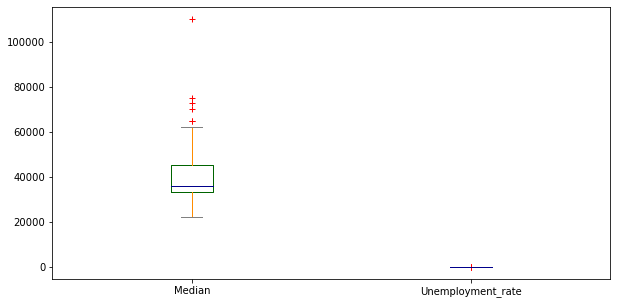

In [19]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
recent_grads[['Median','Unemployment_rate']].plot.box(color=color, sym='r+', figsize = (10,5))

- Using a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

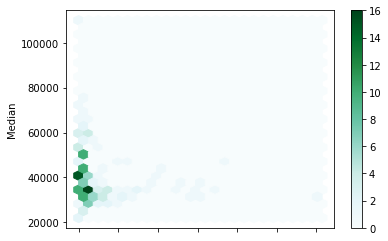

In [21]:
recent_grads.plot.hexbin(x='Women', y='Median', gridsize=25)